### Importing required libraries

In [6]:
# Importing required libraries
import pandas as pd
import os 
import plotly.express as px
import matplotlib.pyplot as plt
import sort_dataframeby_monthorweek as sdw



In [7]:
os.listdir(r'D:\001PythonProject\MyFiles\PythonProject\WasteWaterManagement\DataSet')


['Source.csv',
 'Treatment Plant.csv',
 'WasteWaterManagement.ipynb',
 'WasteWaterTreatmentFact.csv']

### Reading  files - Source.csv',  'Treatment Plant.csv',   'WasteWaterTreatmentFact.csv'

In [8]:
Source_df = pd.read_csv(r'D:\001PythonProject\MyFiles\PythonProject\WasteWaterManagement\DataSet\Source.csv')

In [9]:
Treatment_df = pd.read_csv(r'D:\001PythonProject\MyFiles\PythonProject\WasteWaterManagement\DataSet\Treatment Plant.csv')

In [10]:
WstWatertrt_df = pd.read_csv(r'D:\001PythonProject\MyFiles\PythonProject\WasteWaterManagement\DataSet\WasteWaterTreatmentFact.csv')

In [11]:
Treatment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   PlantID   10 non-null     int64 
 1   name      10 non-null     object
 2   Location  10 non-null     object
 3   Capacity  10 non-null     object
dtypes: int64(1), object(3)
memory usage: 452.0+ bytes


In [12]:
Source_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SourceID         4 non-null      int64 
 1   Source Name      4 non-null      object
 2   Industry Sector  4 non-null      object
dtypes: int64(1), object(2)
memory usage: 228.0+ bytes


In [13]:
WstWatertrt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   SampleID                 1050 non-null   int64 
 1   PlantID                  1050 non-null   int64 
 2   SourceID                 1050 non-null   int64 
 3   Date                     1050 non-null   object
 4   Volume of Water Treated  1050 non-null   int64 
 5   Result                   1050 non-null   object
dtypes: int64(4), object(2)
memory usage: 49.3+ KB


### Data Cleaning and Transformation Activities

Checking Null and duplicate values

In [14]:
Source_df.isnull().sum()

SourceID           0
Source Name        0
Industry Sector    0
dtype: int64

In [15]:
Treatment_df.isnull().sum()

PlantID     0
name        0
Location    0
Capacity    0
dtype: int64

In [16]:
WstWatertrt_df.isnull().sum()

SampleID                   0
PlantID                    0
SourceID                   0
Date                       0
Volume of Water Treated    0
Result                     0
dtype: int64

In [17]:
Source_df.duplicated().sum()


0

In [18]:
Treatment_df.duplicated().sum()


0

In [19]:
WstWatertrt_df.duplicated().sum()

0

Data Type Conversion

In [20]:
WstWatertrt_df


,SampleID,PlantID,SourceID,Date,Volume of Water Treated,Result
0,1,1,1,1/3/2022,33,Pass
1,2,1,2,1/3/2022,27,Fail
2,3,1,3,1/3/2022,28,Pass
3,4,2,1,1/3/2022,16,Pass
4,5,2,2,1/3/2022,16,Pass
...,...,...,...,...,...,...
1045,1046,9,2,2/6/2022,44,Pass
1046,1047,9,3,2/6/2022,42,Pass
1047,1048,10,1,2/6/2022,29,Pass
1048,1049,10,2,2/6/2022,29,Pass


In [21]:
WstWatertrt_df['Date'] = pd.to_datetime(WstWatertrt_df['Date'])

In [22]:
# Deriving new column Weekday
WstWatertrt_df['Weekday'] = WstWatertrt_df['Date'].dt.day_name()

In [23]:
WstWatertrt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   SampleID                 1050 non-null   int64         
 1   PlantID                  1050 non-null   int64         
 2   SourceID                 1050 non-null   int64         
 3   Date                     1050 non-null   datetime64[ns]
 4   Volume of Water Treated  1050 non-null   int64         
 5   Result                   1050 non-null   object        
 6   Weekday                  1050 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 57.6+ KB


In [24]:
Treatment_df

,PlantID,name,Location,Capacity
0,1,San Francisco Treatment Plant,"San Francisco, CA",100 million gallons per day
1,2,Oakland Treatment Plant,"Oakland, CA",50 million gallons per day
2,3,Sacramento Treatment Plant,"Sacramento, CA",25 million gallons per day
3,4,Los Angeles Treatment Plant,"Los Angeles, CA",150 million gallons per day
4,5,San Diego Treatment Plant,"San Diego, CA",100 million gallons per day
5,6,Phoenix Treatment Plant,"Phoenix, AZ",75 million gallons per day
6,7,Denver Treatment Plant,"Denver, CO",50 million gallons per day
7,8,Minneapolis Treatment Plant,"Minneapolis, MN",25 million gallons per day
8,9,Chicago Treatment Plant,"Chicago, IL",150 million gallons per day
9,10,New York Treatment Plant,"New York, NY",100 million gallons per day


In [25]:
# Datatype conversion for Capacity column
Treatment_df['Capacity_new'] = Treatment_df['Capacity'].str.split(' ').str.get(0).astype(int)

In [26]:
Treatment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PlantID       10 non-null     int64 
 1   name          10 non-null     object
 2   Location      10 non-null     object
 3   Capacity      10 non-null     object
 4   Capacity_new  10 non-null     int32 
dtypes: int32(1), int64(1), object(3)
memory usage: 492.0+ bytes


### Data Modelling

In [27]:
# Establishing new relationship between Source_df and WstWatertrt_df
# Merge these 2 tables as we see "SourceID" is common column, we alos use "LEFT" join here, as we need "FACTS" on right side and "Dimensions"

In [28]:
WstWatertrt_Source_df = pd.merge(WstWatertrt_df,Source_df, on = 'SourceID', how = 'left')

In [29]:
# Establishing new relationship between Treatment_df and WstWatertrt_df 
# Merge these 2 tables as we see "PlantID" is common column, we alos use "LEFT" join  as we need "FACTS" on right side and "Dimensions"
WstWatertrt_Treatment_df = pd.merge(WstWatertrt_df,Treatment_df, on = 'PlantID', how = 'left')

### Data Visualisation

KPI 1: Plant that is treating maximum & minimum volume of waste water

In [30]:
WstWatertrt_Treatment_df 

,SampleID,PlantID,SourceID,Date,Volume of Water Treated,Result,Weekday,name,Location,Capacity,Capacity_new
0,1,1,1,2022-01-03,33,Pass,Monday,San Francisco Treatment Plant,"San Francisco, CA",100 million gallons per day,100
1,2,1,2,2022-01-03,27,Fail,Monday,San Francisco Treatment Plant,"San Francisco, CA",100 million gallons per day,100
2,3,1,3,2022-01-03,28,Pass,Monday,San Francisco Treatment Plant,"San Francisco, CA",100 million gallons per day,100
3,4,2,1,2022-01-03,16,Pass,Monday,Oakland Treatment Plant,"Oakland, CA",50 million gallons per day,50
4,5,2,2,2022-01-03,16,Pass,Monday,Oakland Treatment Plant,"Oakland, CA",50 million gallons per day,50
...,...,...,...,...,...,...,...,...,...,...,...
1045,1046,9,2,2022-02-06,44,Pass,Sunday,Chicago Treatment Plant,"Chicago, IL",150 million gallons per day,150
1046,1047,9,3,2022-02-06,42,Pass,Sunday,Chicago Treatment Plant,"Chicago, IL",150 million gallons per day,150
1047,1048,10,1,2022-02-06,29,Pass,Sunday,New York Treatment Plant,"New York, NY",100 million gallons per day,100
1048,1049,10,2,2022-02-06,29,Pass,Sunday,New York Treatment Plant,"New York, NY",100 million gallons per day,100


In [31]:
WstWatertrt_Treatment_df_grouped = WstWatertrt_Treatment_df.groupby('name', as_index=False)['Volume of Water Treated'].sum()

In [32]:
WstWatertrt_Treatment_df_grouped


,name,Volume of Water Treated
0,Chicago Treatment Plant,4577
1,Denver Treatment Plant,1298
2,Los Angeles Treatment Plant,4983
3,Minneapolis Treatment Plant,677
4,New York Treatment Plant,3145
5,Oakland Treatment Plant,1518
6,Phoenix Treatment Plant,2377
7,Sacramento Treatment Plant,668
8,San Diego Treatment Plant,2810
9,San Francisco Treatment Plant,3133


In [33]:
type(WstWatertrt_Treatment_df_grouped) # please note in groupeby methon we must use as_index = False to create Dataframe, 
## we can not use series data type for visualisation

pandas.core.frame.DataFrame

In [34]:
# Plot total volume of waste water treated by different treatment plants

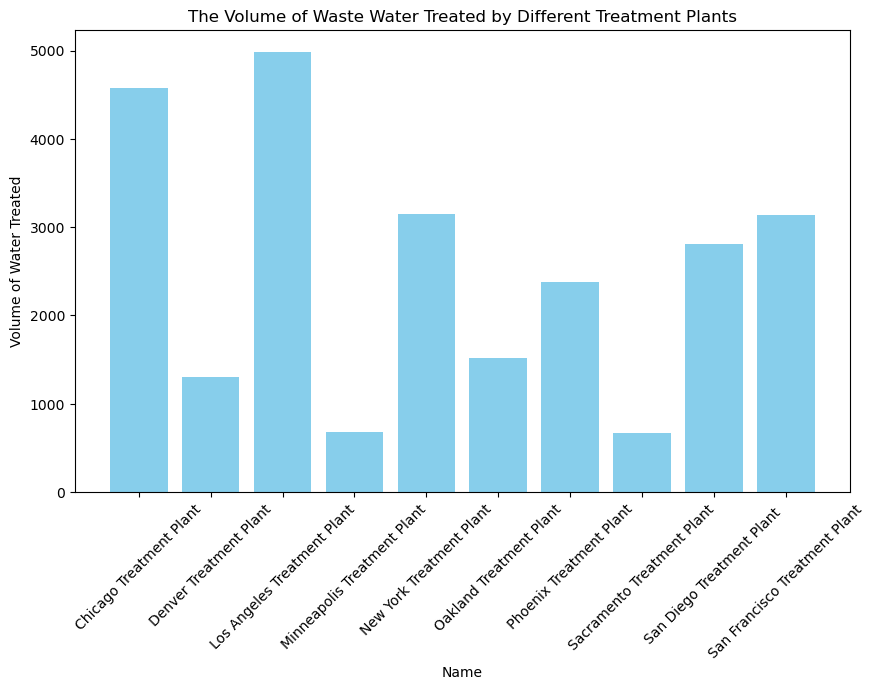

In [35]:
# example of graph using Matplotlib librady 
plt.figure(figsize=(10, 6))
plt.bar(WstWatertrt_Treatment_df_grouped['name'], WstWatertrt_Treatment_df_grouped['Volume of Water Treated'], color='skyblue',)

# Adding titles and labels
plt.title('The Volume of Waste Water Treated by Different Treatment Plants')
plt.xlabel('Name')
plt.ylabel('Volume of Water Treated')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

### Note

Plotly Express is ideal for:

Quickly creating interactive and visually appealing plots. <Br>
Embedding plots in web applications. <Br>
Users who prefer simplicity and ease of use.

Matplotlib is ideal for:

Users needing highly customized plots.<Br>
Situations where performance with large datasets is crucial.<Br>
Users who require static plots for publications or reports.

In this project we suing Plotly Express for data visualisation

In [36]:
fig = px.bar(WstWatertrt_Treatment_df_grouped.sort_values(by='Volume of Water Treated', ascending=False), x = 'name', y = 'Volume of Water Treated', template= 'plotly_dark', color = 'name', text='Volume of Water Treated')
fig.update_layout(xaxis_title='Treatment Plant Name', yaxis_title = 'Volume of Waste Water Treated(million gallons)', title =dict(text='The Volume of Waste Water Treated by Different Treatment Plants', x=0.5), width=1000)
fig.show()

KPI 2 : % Contribution of waste water from different Sources 

In [37]:
WstWatertrt_Source_grouped_df= WstWatertrt_Source_df.groupby('Source Name', as_index=False)['Volume of Water Treated'].sum()

In [38]:
WstWatertrt_Source_grouped_df

,Source Name,Volume of Water Treated
0,Healthcare,8403
1,Industrial,8408
2,Residential,8375


In [39]:
fig = px.pie(WstWatertrt_Source_grouped_df, names = 'Source Name', values = 'Volume of Water Treated', template= 'plotly_dark', hole=0.5)
fig.update_layout(width =500, title = dict(text='% Contribution of waste water from different Sources', x=0.5))
fig.show()

KPI 3:  Highly utilized Treatment Plant 

Sumation on Voulume of waste water treated on the basis of the plan name and data

In [40]:
WstWatertrt_Treatment_grp_vol_df = WstWatertrt_Treatment_df.groupby(['name','Date'], as_index=False)['Volume of Water Treated'].sum().sort_values(by=['name','Date'])

In [41]:
WstWatertrt_Treatment_grp_vol_df

,name,Date,Volume of Water Treated
0,Chicago Treatment Plant,2022-01-03,136
1,Chicago Treatment Plant,2022-01-04,134
2,Chicago Treatment Plant,2022-01-05,129
3,Chicago Treatment Plant,2022-01-06,128
4,Chicago Treatment Plant,2022-01-07,128
...,...,...,...
345,San Francisco Treatment Plant,2022-02-02,92
346,San Francisco Treatment Plant,2022-02-03,96
347,San Francisco Treatment Plant,2022-02-04,91
348,San Francisco Treatment Plant,2022-02-05,88


Taking mean of Capacit_new column on the basis of plant name and date

In [42]:
WstWatertrt_Treatment_grp_cap_df = WstWatertrt_Treatment_df.groupby(['name','Date'], as_index=False)['Capacity_new'].mean().sort_values(by=['name','Date'])

In [43]:
WstWatertrt_Treatment_grp_cap_df

,name,Date,Capacity_new
0,Chicago Treatment Plant,2022-01-03,150.0
1,Chicago Treatment Plant,2022-01-04,150.0
2,Chicago Treatment Plant,2022-01-05,150.0
3,Chicago Treatment Plant,2022-01-06,150.0
4,Chicago Treatment Plant,2022-01-07,150.0
...,...,...,...
345,San Francisco Treatment Plant,2022-02-02,100.0
346,San Francisco Treatment Plant,2022-02-03,100.0
347,San Francisco Treatment Plant,2022-02-04,100.0
348,San Francisco Treatment Plant,2022-02-05,100.0


identification of  'Utilisation' of plant on daily basis

In [44]:
WstWatertrt_Treatment_grp_cap_df['Utilization']=WstWatertrt_Treatment_grp_vol_df['Volume of Water Treated'] / WstWatertrt_Treatment_grp_cap_df['Capacity_new']*100

In [45]:
WstWatertrt_Treatment_grp_cap_df['Utilization'] = WstWatertrt_Treatment_grp_cap_df['Utilization'].round(2)


Taking average of utilization of treatment plant

In [46]:
Avg_Utilization_df = WstWatertrt_Treatment_grp_cap_df.groupby('name', as_index=False)['Utilization'].mean().round(2)

In [47]:
Avg_Utilization_df

,name,Utilization
0,Chicago Treatment Plant,87.18
1,Denver Treatment Plant,74.17
2,Los Angeles Treatment Plant,94.91
3,Minneapolis Treatment Plant,77.37
4,New York Treatment Plant,89.86
5,Oakland Treatment Plant,86.74
6,Phoenix Treatment Plant,90.55
7,Sacramento Treatment Plant,76.34
8,San Diego Treatment Plant,80.29
9,San Francisco Treatment Plant,89.51


Ploting Utilization graph on Date

In [48]:
fig= px.bar(Avg_Utilization_df.sort_values(by='Utilization'), x='Utilization', y='name', template='plotly_dark', color ='Utilization', text='Utilization')
fig.update_layout(title=dict(text='Utilization of Treatment Plant', x=0.5), width=1000, height=500, yaxis_title = 'Waste Water Treatment Plant Name')
fig.show()

KPI 4: Identifying Highly Efficient Treatment Plant

In [49]:
Successful_Treated_df = WstWatertrt_Treatment_df[WstWatertrt_Treatment_df['Result'] == 'Pass'].groupby('name', as_index=False)['Volume of Water Treated'].sum().sort_index()

In [50]:
Successful_Treated_df

,name,Volume of Water Treated
0,Chicago Treatment Plant,4110
1,Denver Treatment Plant,1221
2,Los Angeles Treatment Plant,4366
3,Minneapolis Treatment Plant,585
4,New York Treatment Plant,2792
5,Oakland Treatment Plant,1238
6,Phoenix Treatment Plant,2129
7,Sacramento Treatment Plant,543
8,San Diego Treatment Plant,2530
9,San Francisco Treatment Plant,2596


In [51]:
WstWatertrt_Treatment_df_grouped = WstWatertrt_Treatment_df_grouped.sort_values(by='name')

In [52]:
WstWatertrt_Treatment_df_grouped

,name,Volume of Water Treated
0,Chicago Treatment Plant,4577
1,Denver Treatment Plant,1298
2,Los Angeles Treatment Plant,4983
3,Minneapolis Treatment Plant,677
4,New York Treatment Plant,3145
5,Oakland Treatment Plant,1518
6,Phoenix Treatment Plant,2377
7,Sacramento Treatment Plant,668
8,San Diego Treatment Plant,2810
9,San Francisco Treatment Plant,3133


In [53]:
Successful_Treated_df['Efficiency'] = Successful_Treated_df['Volume of Water Treated']/WstWatertrt_Treatment_df_grouped['Volume of Water Treated']*100

In [54]:
Successful_Treated_df = Successful_Treated_df.round(2)

Plot : Efficiency of Treatment of plant

In [55]:
fig= px.bar(Successful_Treated_df.sort_values(by='Efficiency'), x='Efficiency', y='name', template='plotly_dark', color ='Efficiency', text='Efficiency')
fig.update_layout(title=dict(text='Efficiency of Treatment Plant', x=0.5), width=1000, height=500, yaxis_title = 'Waste Water Treatment Plant Name')
fig.show()


KPI 5: Day Wise Activity of Treatment Plant 

In [56]:
Weekdaywise_Activity_df = WstWatertrt_Treatment_df.groupby(['name', 'Weekday'], as_index=False)['Volume of Water Treated'].sum()

In [63]:
# we sorting data by Daywise
Weekdaywise_Activity_df = sdw.Sort_Dataframeby_Weekday(Weekdaywise_Activity_df, 'Weekday')

In [62]:
fig= px.line(Weekdaywise_Activity_df, x='name', y='Volume of Water Treated', template='plotly_dark', color ='Weekday')
fig.update_layout(title=dict(text='Day Wise Activity of Treatment Plant', x=0.5), width=1000, height=500, yaxis_title = 'Waste Water Treatment Plant Name')
fig.show()


Analyis is done, all geinve KIPs are derived. Thank you. Conclusions are mentioned in PDF.